# Ejercicio 1
Existen muchos algoritmos para ordenar arreglos o listas. Al igual que existe más de una forma de encontrar elementos dentro de un arreglo. 

Estos algoritmos tienen distintos tiempos para ordenar, todos en función del la cantidad de elementos que contiene el arreglo. A esto se le llama _complejidad_. Una de las medidas más usadas es la de _Big O_. 

Para este ejercicio, usted tomará en consideración 5 de los algoritmos más usados para ordenamiento:
| Nombre            | Descripción                                   | Complejidad   |
|-------------------|-----------------------------------------------|---------------|
| Bubble Sort       | Intercambia pares adyacentes.                 | $O(n^2)$      |
| Selection Sort    | Selecciona el mínimo y lo coloca al inicio.   | $O(n^2)$      |
| Insertion Sort    | Inserta cada elemento en su lugar.            | $O(n^2)$      |
| Merge Sort        | Divide y combina ordenadamente.               | $O(n \log n)$ |
| Quick Sort        | Usa pivotes para dividir y ordenar.           | $O(n \log n)$ |

Su tarea no será complicada, no se preocupe. Simplemente tendrá que implementar los 5 algoritmos presentados anteriormente, medir el tiempo de cada uno (la sugerencia es utilizar decoradores, aunque cualquier forma de medirlos estará bien), guardar los tiempos y graficarlos.

Esta última parte es importante, usted graficará los tiempos de ordenamiento de cada algoritmo utilizando `matplotlib`. Lo hará en relación tamaño - tiempo.

Utilizará arreglos con datos aleatorios que vayan desde 0 hasta 100. Los arreglos tendrán tamaños de 1, 5, 10, 15, 20, 30, 40, 50, 75, 100, 150, 200, 300, 400, 500, 750, 1000, 2000, 5000, 10000. Haga cada tamaño 10 veces, y use el promedio para la gráfica (para evitar el ruido). 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [14]:
def arreglo(n):
    return np.random.randint(0, 101, size=(10, n))

In [15]:
times = {
    'bubble_sort'       : [[],[]],
    'selection_sort'    : [[],[]],
    'insertion_sort'    : [[],[]],
    'numpy_sort'        : [[],[]],
    'merge_sort'        : [[],[]],
    'quick_sort'        : [[],[]],
}

def algorithm_timer(name):
    def timer_it(algorith):
        def timer(*args, **kwargs):
            size = len(*args, **kwargs)
            start = time()
            arr = algorith(*args, **kwargs)
            end = time()
            interval = end - start
            return arr, interval, size, name
        return timer
    return timer_it

def swap(arr, a, b):
    arr[a], arr[b] = arr[b], arr[a]
    
def save_time(arrays, algorithm):
    l = len(arrays)
    t = np.zeros(l)
    for i in range(l):
        _, interval, size, name = algorithm(arrays[i])
        t[i] = interval
    total_time = t.mean()
    times[name][0].append(size)
    times[name][1].append(total_time)
    print(f"A {name} le tomó {total_time} segundos el arreglo de {size} elementos.")

In [16]:
@algorithm_timer('bubble_sort')
def bubble_sort(arr):
    while True:
        flag = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                swap(arr, i, i + 1)
                flag = True
        if not flag:
            break
    return arr

@algorithm_timer('selection_sort')
def selection_sort(arr):
    l = len(arr)
    for i in range(l):
        m = i
        for j in range(i, l):
            if arr[j] < arr[m]:
                m = j
        swap(arr, i, m) 
    return arr

@algorithm_timer('insertion_sort')
def insertion_sort(arr):
    for i in range(1, len(arr)):
        for j in range(i, 0, -1):
            if arr[j] < arr[j - 1]:
                swap(arr, j, j - 1)
            else:
                break
    return arr

@algorithm_timer('numpy_sort')
def numpy_sort(arr):
    arr.sort()
    return arr

@algorithm_timer('merge_sort')
def merge_sort(arr):
    def sort(A):
        if len(A) <= 1:
            return A
        A1, A2 = split(A)
        A1, A2 = sort(A1), sort(A2)
        A = merge(A1, A2, A.copy())
        return A
    
    def split(A):
        m = len(A) // 2
        return A[:m], A[m:]
    
    def merge(A1, A2, A):
        a1, a2 = 0, 0
        la1, la2 = len(A1), len(A2)
        for i in range(len(A)):
            if a1 >= la1 or a2 >= la2:
                if a1 >= la1:
                    A[i] = A2[a2]
                    a2 += 1
                else:
                    A[i] = A1[a1]
                    a1 += 1
            elif A1[a1] < A2[a2]:
                A[i] = A1[a1]
                a1 += 1
            else:
                A[i] = A2[a2]
                a2 += 1
        return A
    
    return sort(arr)

@algorithm_timer('quick_sort')
def quick_sort(arr):
    def sort(A):
        l = len(A)
        if l <= 1:
            return A
        pivot = l - 1
        for i in range(l - 2, -1, -1):
            if A[i] > A[pivot]:
                swap(A, pivot, pivot - 1)
                if i != pivot - 1:
                    swap(A, pivot, i)
                pivot -= 1
        A1, A2 = split(A, pivot)
        A = np.concatenate((sort(A1.copy()), A[pivot: pivot + 1].copy(), sort(A2.copy())))
        return A
    def split(A, p):
        return A[:p], A[p + 1:]
    return sort(arr)

In [18]:
sizes = [1, 5, 10, 15, 20, 30, 40, 50, 75, 100, 150, 200, 300, 400, 500, 750, 1000, 2000, 5000, 10000]

algorithms = [bubble_sort, selection_sort, insertion_sort, numpy_sort, merge_sort, quick_sort]

for i in sizes:
    arrays = arreglo(i)
    for algorithm in algorithms:
        save_time(arrays.copy(), algorithm)

A bubble_sort le tomó 7.867813110351562e-07 segundos el arreglo de 1 elementos.
A selection_sort le tomó 2.288818359375e-06 segundos el arreglo de 1 elementos.
A insertion_sort le tomó 5.7220458984375e-07 segundos el arreglo de 1 elementos.
A numpy_sort le tomó 0.00010383129119873047 segundos el arreglo de 1 elementos.
A merge_sort le tomó 1.3113021850585938e-06 segundos el arreglo de 1 elementos.
A quick_sort le tomó 9.298324584960937e-07 segundos el arreglo de 1 elementos.
A bubble_sort le tomó 8.130073547363282e-06 segundos el arreglo de 5 elementos.
A selection_sort le tomó 9.989738464355468e-06 segundos el arreglo de 5 elementos.
A insertion_sort le tomó 7.05718994140625e-06 segundos el arreglo de 5 elementos.
A numpy_sort le tomó 0.00027210712432861327 segundos el arreglo de 5 elementos.
A merge_sort le tomó 5.0067901611328125e-05 segundos el arreglo de 5 elementos.
A quick_sort le tomó 2.7704238891601563e-05 segundos el arreglo de 5 elementos.
A bubble_sort le tomó 3.64065170288

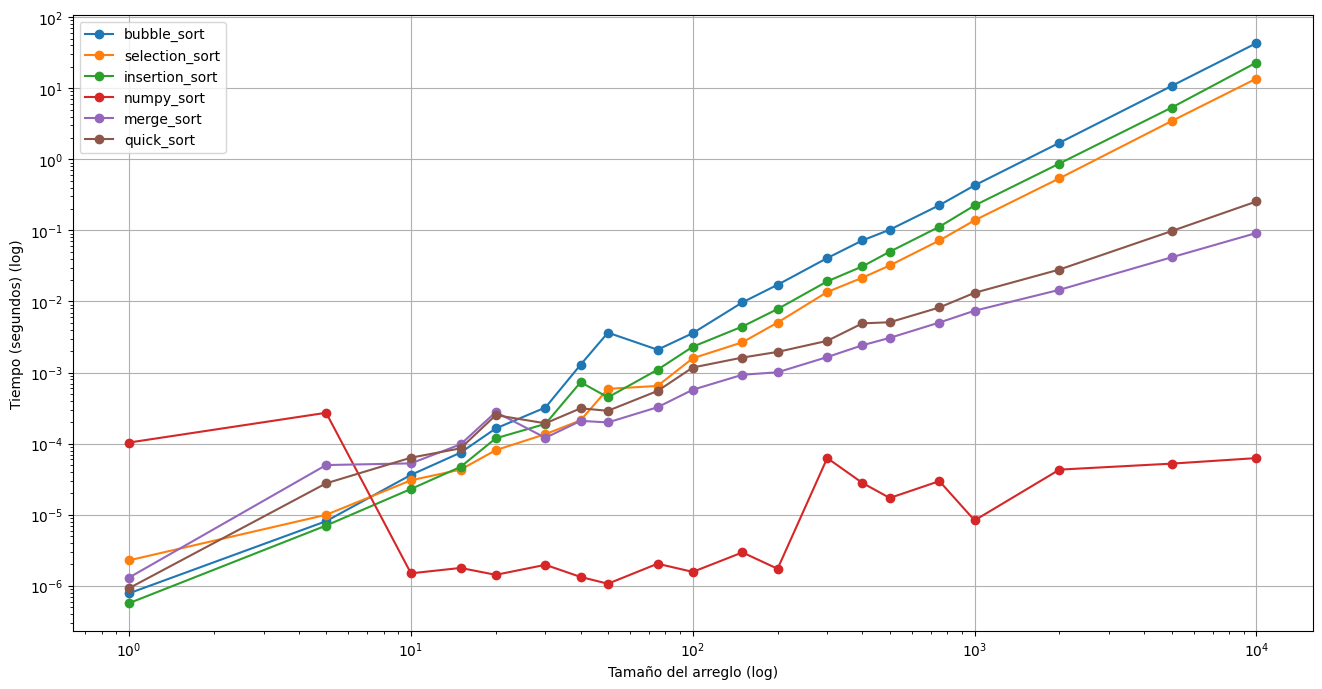

In [21]:
plt.figure(figsize=(16, 8))

for alg in times.keys():
    plt.plot(times[alg][0], times[alg][1], 'o-', label=alg)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño del arreglo (log)')
plt.ylabel('Tiempo (segundos) (log)')
plt.legend()
plt.grid(True)
plt.show()